In [1]:
#import tensorflow as tf
#import tensorflow_hub as hub
#import tensorflow_text
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import seaborn as sn
from matplotlib import pyplot as plt
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, confusion_matrix,accuracy_score,f1_score
from scipy.optimize import linear_sum_assignment

from datasets import load_dataset
dataset = load_dataset("tasksource/crowdflower" , "text_emotion")

c:\Users\RoscaMitrut\.conda\envs\tfgpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
labeluri = {
    "0": "sadness",
    "1": "empty",
	"2": "relief",
	"3": "hate",
	"4": "worry",
	"5": "enthusiasm",
	"6": "happiness",
	"7": "neutral",
	"8": "love",
	"9": "fun",
	"10": "anger",
	"11": "surprise",
    "12": "boredom"
}
for i in range(0,13):
	print(labeluri[str(i)],":  ",dataset["train"]["label"].count(i))

sadness :   5165
empty :   827
relief :   1526
hate :   1323
worry :   8457
enthusiasm :   759
happiness :   5209
neutral :   8638
love :   3842
fun :   1776
anger :   110
surprise :   2187
boredom :   179


In [3]:
date_X = dataset["train"]["text"]
date_Y = dataset["train"]["label"]

In [4]:
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')
#sbert_model = SentenceTransformer('all-mpnet-base-v2')

data_X_embeded = sbert_model.encode(date_X)

c:\Users\RoscaMitrut\.conda\envs\tfgpu\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\RoscaMitrut\.conda\envs\tfgpu\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [5]:

kmeans = KMeans(n_clusters=13).fit(data_X_embeded)

acc:  0.06075303765188259
f1:  [0.06841144 0.0196736  0.04805451 0.0052146  0.14703625 0.01373096
 0.0127486  0.09698873 0.02694899 0.09248945 0.00521173 0.04326923
 0.00509165]


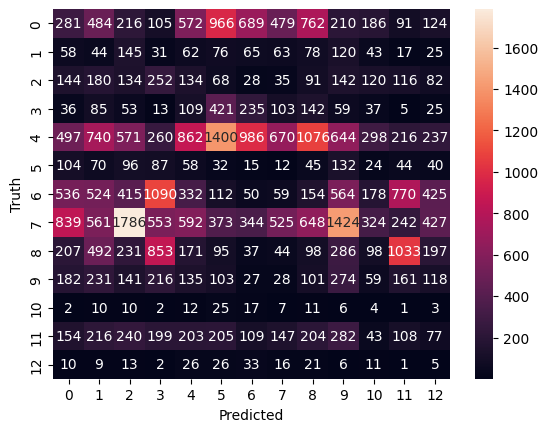

In [6]:
print("acc: ", accuracy_score(date_Y, kmeans.labels_))
print("f1: ", f1_score(date_Y, kmeans.labels_,average=None))

cm = confusion_matrix(date_Y, kmeans.labels_)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [7]:
ari = adjusted_rand_score(date_Y, kmeans.labels_)
nmi = normalized_mutual_info_score(date_Y, kmeans.labels_)
homogeneity = homogeneity_score(date_Y, kmeans.labels_)
completeness = completeness_score(date_Y, kmeans.labels_)
v_measure = v_measure_score(date_Y, kmeans.labels_)
print("Normalized Mutual Information:", nmi)
print("Adjusted Rand Index:", ari)
print("Homogeneity:", homogeneity)
print("Completeness:", completeness)
print("V-Measure:", v_measure)

Normalized Mutual Information: 0.07525588901882015
Adjusted Rand Index: 0.03920110951995459
Homogeneity: 0.08192479695175067
Completeness: 0.06959098770409783
V-Measure: 0.07525588901882013


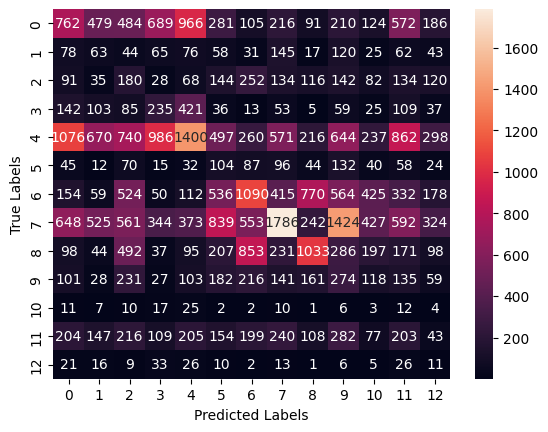

In [8]:
row_ind, col_ind = linear_sum_assignment(-cm)

label_mapping = {old_label: new_label for old_label, new_label in zip(col_ind, row_ind)}

mapped_labels = np.array([label_mapping[label] for label in kmeans.labels_])

cm = confusion_matrix(date_Y, mapped_labels)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
